# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import nltk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

# Load Data

In [2]:
df_final = pd.read_csv('C:/Users/melin/Documents/Springboard Data Science Career Track/Capstone Projects/Capstone Project 1/df_final.csv')
df_final.head()

,device_id,device_name,device_country,event_id,action_classification,event_country,reason,type,clean_reason
0,861.0,Invacare Action 3 Junior Push Bar Handle,NZL,957.0,NaN,NZL,The failure of the finger bolts can lead to injuries if control of the chair is lost.,Recall,failur finger bolt lead injuri control chair lost
1,862.0,Bio-Rad D-10 Hemoglobin A Program Reorder pack,NZL,958.0,NaN,NZL,Medical Device Correction iniitiated as a result of of customer complaints investigation for anothe product regarding calibration failure and late retention times associated with Elution Buffers. The company examined the potential for a similar problem with the above buffer lots. Bio-Rad request...,Recall,medic devic correct iniiti result custom complaint investig anoth product regard calibr failur late retent time associ elut buffer compani examin potenti similar problem abov buffer lot bio rad request custom discard affect product
2,863.0,"Bio-Rad VARIANT 11 beta Thalassemmia Short program Reorder pack, 500 tests",NZL,959.0,NaN,NZL,Medical Device Correction iniitiated as a result of of customer complaints investigation for anothe product regarding calibration failure and late retention times associated with Elution Buffers. The company examined the potential for a similar problem with the above buffer lots. Bio-Rad request...,Recall,medic devic correct iniiti result custom complaint investig anoth product regard calibr failur late retent time associ elut buffer compani examin potenti similar problem abov buffer lot bio rad request custom discard affect product
3,1062.0,Bio-Rad IH-Com Kit Fullversion (Data management and result Interpretation),NZL,1159.0,NaN,NZL,"In case of non interpretable results in the anti-AB well (ABO3) of ID-cards intended for ABO forward grouping, the IH-Com software does not include the reaction of this well (result code-30) wheh sending the result to the laboratory Host. The issue can only occur if the following conditions are ...",Recall,case non interpret result anti ab well abo id card intend abo forward group ih com softwar doe includ reaction thi well result code wheh send result laboratori host issu onli occur follow condit met ih com softwar connect laboratori host astm commun mode abo interpret result obtain due reaction ...
4,1088.0,Bio-Rad Urinary Catecholamines by HPLC Reagent Kit,NZL,1185.0,NaN,NZL,"In some urine samples the concentration of adrenaline/epinephrine may decrease when analysis time is >8 hours., This decrease in concentration occurs only, if samples were subsequently adjusted to pH 5 to pH 7 as described in the instruction for use for very acidic samples or sampl...",Recall,urin sampl concentr adrenalin epinephrin may decreas analysi time hour thi decreas concentr occur onli sampl subsequ adjust ph ph describ instruct use veri acid sampl sampl low volum risk fals neg result report sampl experi condit


# Explore Data Storytelling

1. Can you count something interesting?

In [3]:
#Create a table of the 20 most frequent words from the uncleaned reason column
print('20 Most Frequent Words of "reason" in df_final')
text_unclean = Counter(" ".join(df_final['reason']).split()).most_common(20)
for word, count in text_unclean: #having the keys and counts to be printed out of dictionary
    print(word + ": " + str(count))

20 Most Frequent Words of "reason" in df_final
the: 134416
of: 61442
to: 47582
THE: 37570
and: 37003
a: 35645
in: 34678
may: 23955
is: 23455
The: 22698
for: 19956
that: 18616
with: 15692
OF: 15108
not: 14214
or: 13657
A: 13642
has: 13539
on: 13235
be: 12316


In [4]:
#Remove rows containing missing values under the clean_reason column 
df_final = df_final[df_final['clean_reason'].notnull()]

#Remove rows containing missing values under the clean_reason column 
print('20 Most Frequent Words of "clean_reason" in df_final')
text_clean = Counter(" ".join(df_final['clean_reason']).split()).most_common(20)
for word, count in text_clean: #having the keys and counts to be printed out of dictionary
    print(word + ": " + str(count))

20 Most Frequent Words of "clean_reason" in df_final
may: 29881
use: 19747
result: 18731
product: 18501
ha: 17194
devic: 17062
thi: 14552
patient: 13591
system: 13070
manufactur: 11976
potenti: 11431
steril: 10059
lot: 9634
wa: 9460
dure: 9330
recal: 8892
affect: 8700
issu: 8491
report: 7907
packag: 7663


In [5]:
#Counting frequency of each event type recorded
df_final['type'].value_counts().rename_axis('Event Type').reset_index(name = 'Count')

,Event Type,Count
0,Recall,56955
1,Safety alert,3821
2,Field Safety Notice,992
3,Recall / Safety Alert,14


In [6]:
#Counting frequency of each event risk class recorded
df_final['action_classification'].value_counts().rename_axis('Event Risk Class').reset_index(name = 'Count')

,Event Risk Class,Count
0,Class 2,41373
1,Class 3,6896
2,Class 1,3996


Counting the word frequency of both the reason and clean_reason columns of df_final dataframe showed how well the text cleaning methods worked in removing the punctuations and stop words of the text as well as stemming them. 

Despite most of the medical devices recorded to being recalled, Class 1 (the event risk class that is the most serious in health hazard) is the least recorded. Perhaps, NLP can shed light on other reasons for medical devices to being recalled besides how severe they were considered in health risk.

2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

Trends cannot be viewed as the values of the columns are discrete and not continuous.

3. Can you make a bar plot or a histogram?

Figure 1: 100 Most Frequent Words of "reason" in df_final


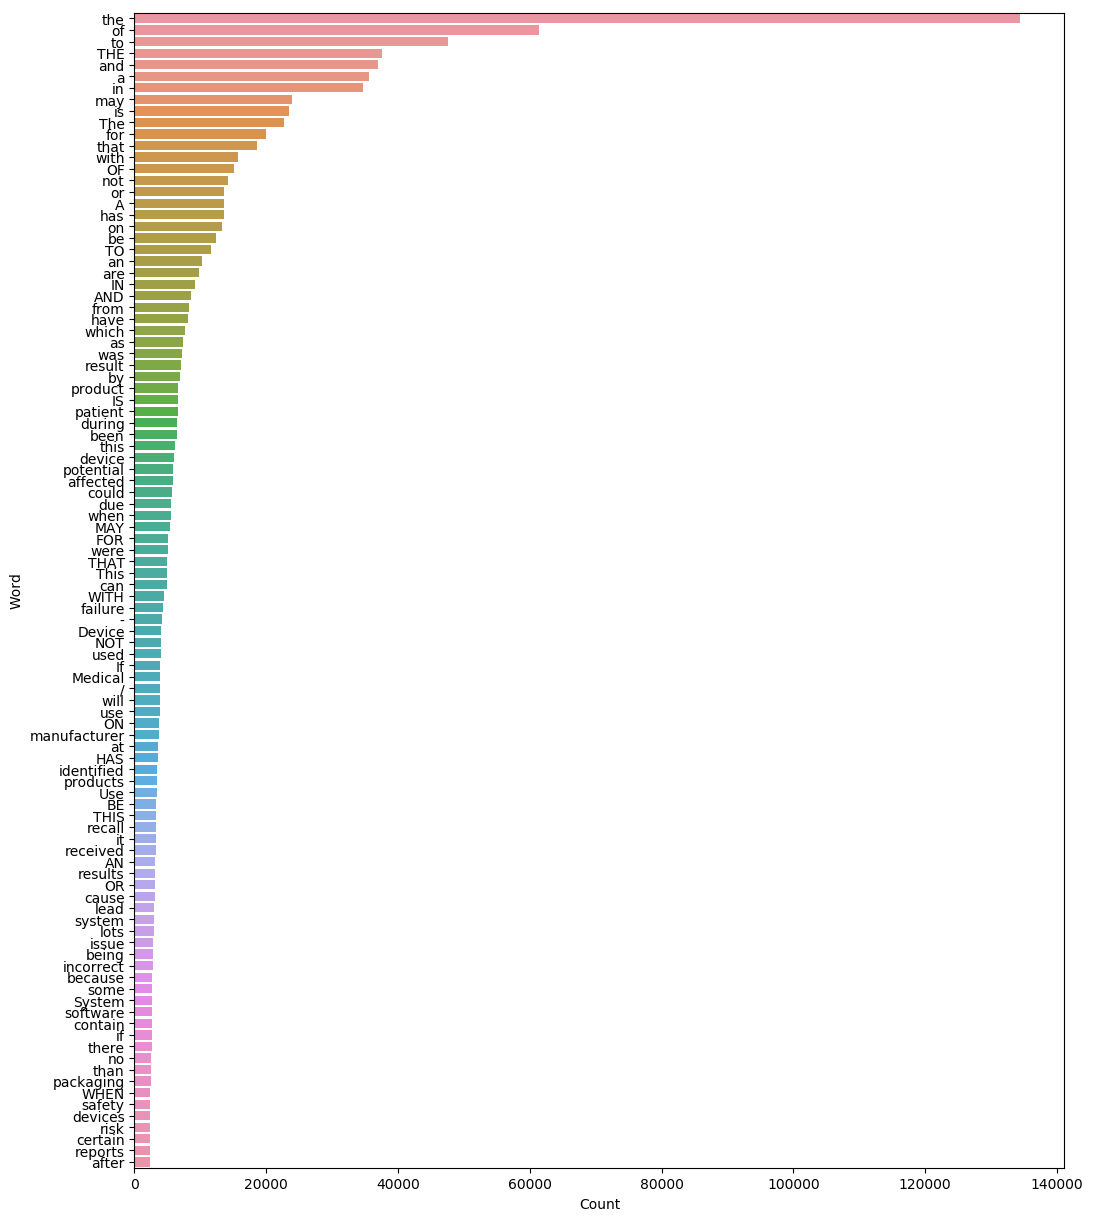

In [7]:
#Restore the rc params from the original rc file loaded by Matplotlib.
matplotlib.rc_file_defaults()

#Create a function that makes a word frequency bar plot
def freq_words(x, terms): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(xlabel = 'Count', ylabel = 'Word')  
  plt.show()
  
#print 100 most frequent words of the reason column in the df_final dataframe
print('Figure 1: 100 Most Frequent Words of "reason" in df_final')
freq_words(df_final['reason'], 100)

Figure 2: 100 Most Frequent Words of "clean_reason" in df_final


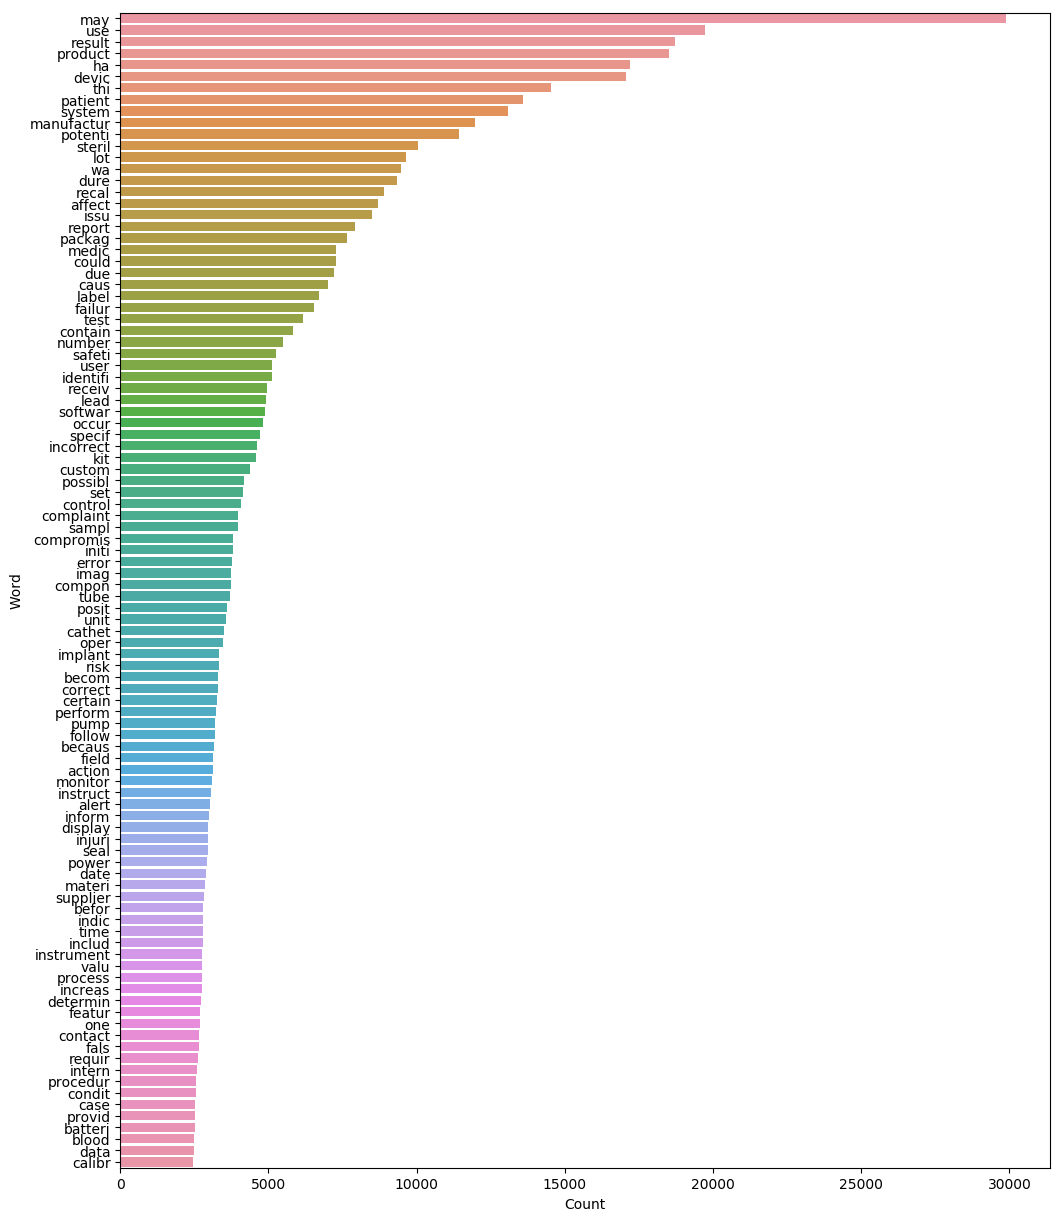

In [8]:
# print 100 most frequent words of the clean_reason column in the df_final dataframe
print('Figure 2: 100 Most Frequent Words of "clean_reason" in df_final')
freq_words(df_final['clean_reason'], 100)

Figure 2 shows how much more meaningful words appear in the word frequency count of the text under the reason column in the df_final dataset after text cleaning was applied to it.

4. Can you compare two related quantities?

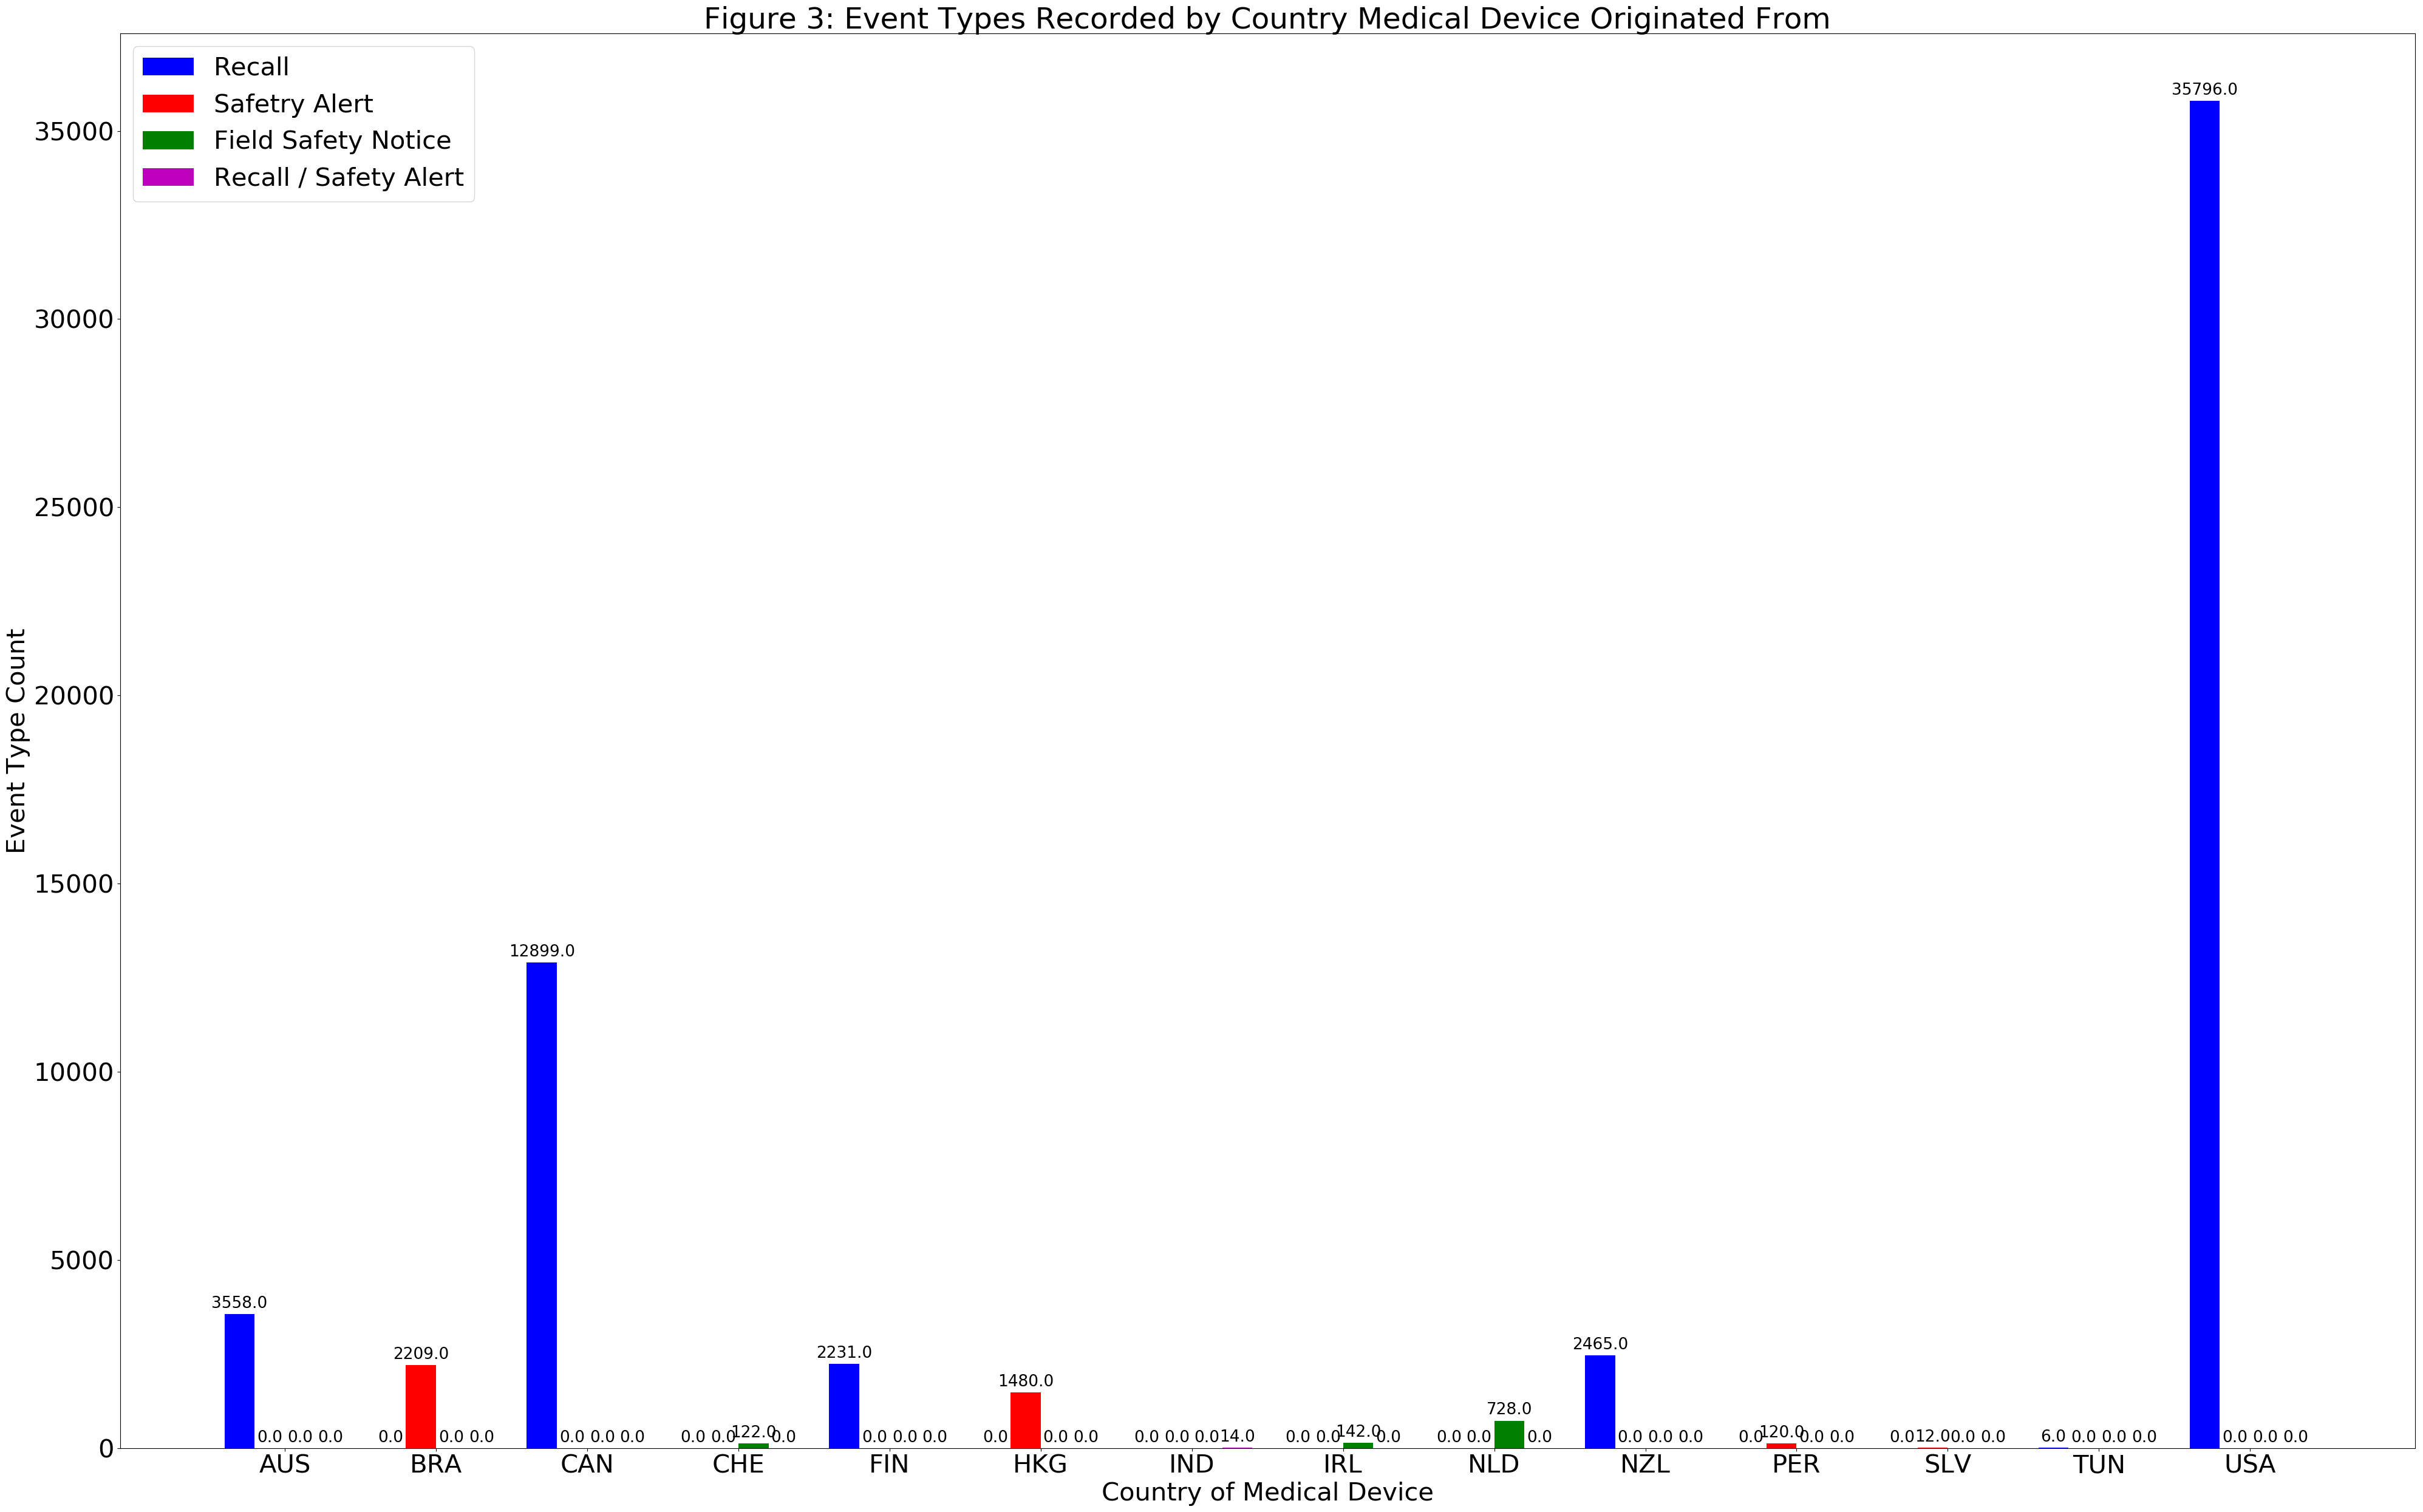

In [11]:
## Create bar graph of event type count vs country of medical device
#Changing default parameters of graph title and axes
params = {'axes.titlesize':'35',
          'axes.labelsize':'30',
          'xtick.labelsize':'30',
          'ytick.labelsize':'30',
          'legend.fontsize': '30',
          'legend.handlelength': '2'}
matplotlib.rcParams.update(params)

d_country = sorted(df_final['device_country'].unique())
recall_count = list(df_final.type.eq('Recall').groupby(df_final.device_country).sum())
safety_alert_count = list(df_final.type.eq('Safety alert').groupby(df_final.device_country).sum())
FSN_count = list(df_final.type.eq('Field Safety Notice').groupby(df_final.device_country).sum())
R_FS_count = list(df_final.type.eq('Recall / Safety Alert').groupby(df_final.device_country).sum())

x = np.arange(len(d_country))  # the x locations for the countries in device_country
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize = (40,25))
rects1 = ax.bar(x - 0.40, recall_count, width, color = 'b', label='Recall', align='edge')
rects2 = ax.bar(x - 0.20, safety_alert_count, width, color = 'r', label='Safetry Alert', align='edge')
rects3 = ax.bar(x, FSN_count, width, color = 'g', label='Field Safety Notice', align='edge')
rects4 = ax.bar(x + 0.20, R_FS_count, width, color = 'm', label='Recall / Safety Alert', align='edge')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Country of Medical Device')
ax.set_ylabel('Event Type Count')
ax.set_title('Figure 3: Event Types Recorded by Country Medical Device Originated From')
ax.set_xticks(x)
ax.set_xticklabels(d_country)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom').set_fontsize(19)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

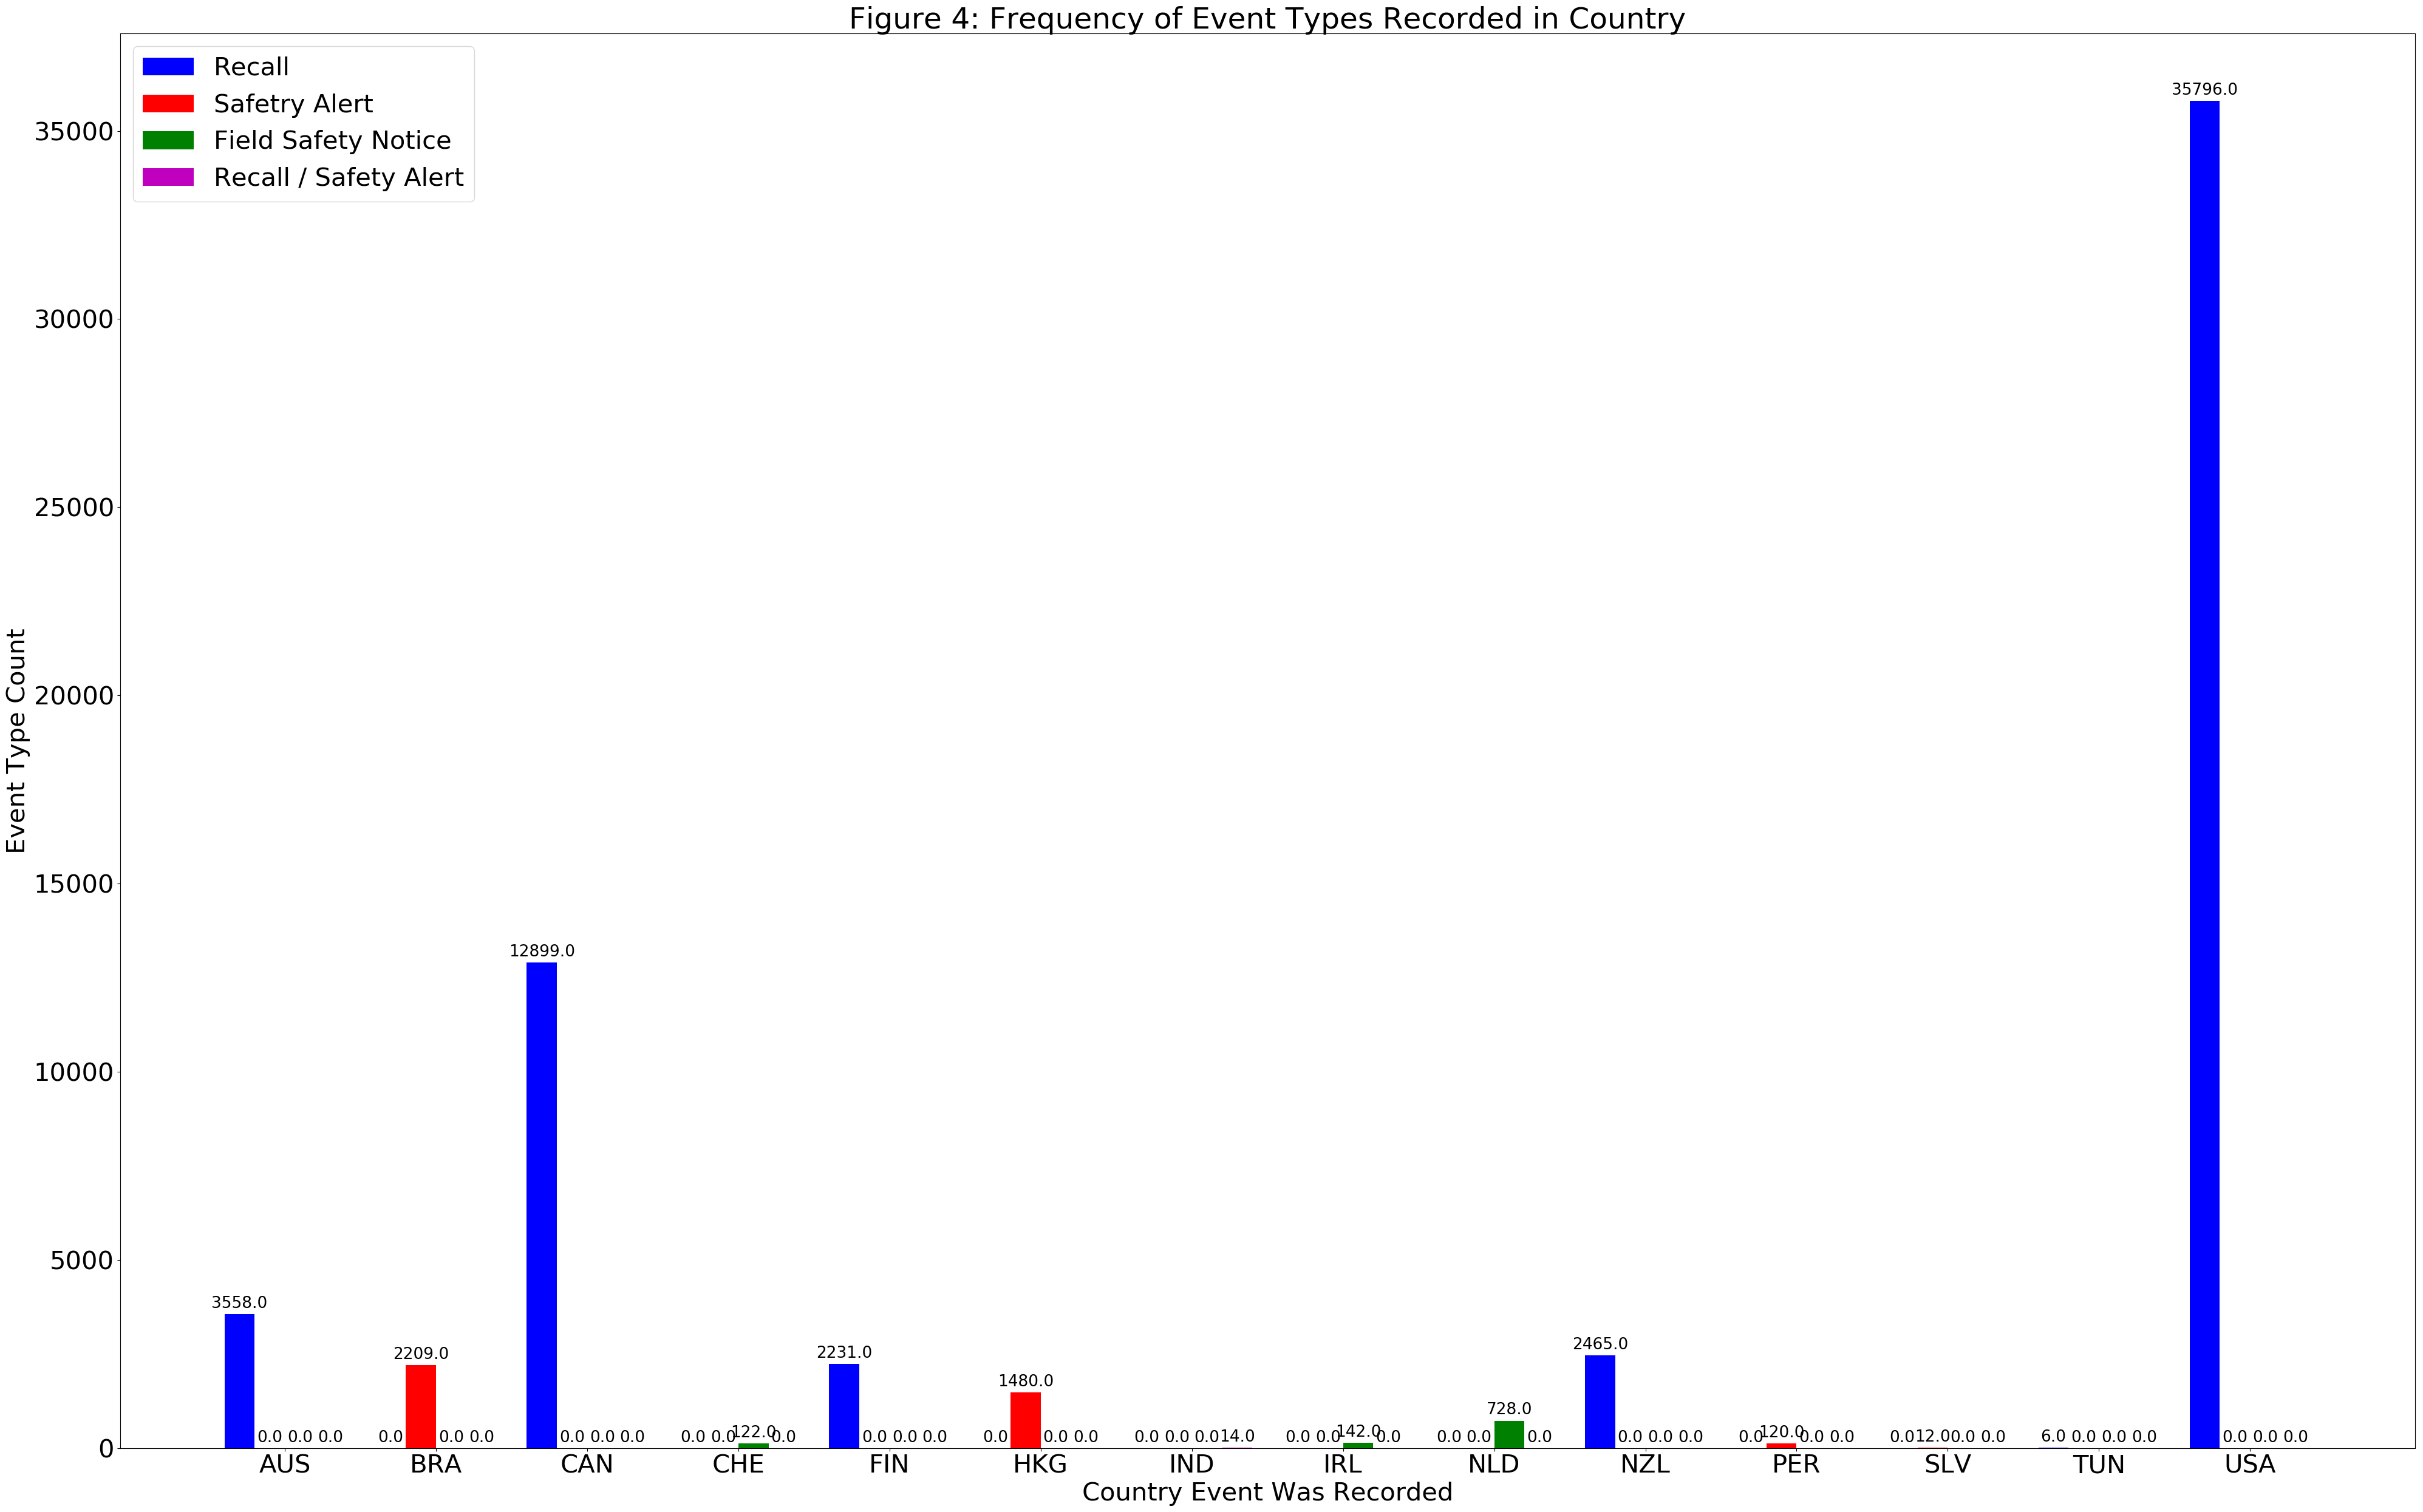

In [12]:
e_country = sorted(df_final['event_country'].unique())
recall_count = list(df_final.type.eq('Recall').groupby(df_final.event_country).sum())
safety_alert_count = list(df_final.type.eq('Safety alert').groupby(df_final.event_country).sum())
FSN_count = list(df_final.type.eq('Field Safety Notice').groupby(df_final.event_country).sum())
R_FS_count = list(df_final.type.eq('Recall / Safety Alert').groupby(df_final.event_country).sum())

x = np.arange(len(e_country))  # the x locations for the countries in device_country
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize = (40,25))
rects1 = ax.bar(x - 0.40, recall_count, width, color = 'b', label='Recall', align='edge')
rects2 = ax.bar(x - 0.20, safety_alert_count, width, color = 'r', label='Safetry Alert', align='edge')
rects3 = ax.bar(x, FSN_count, width, color = 'g', label='Field Safety Notice', align='edge')
rects4 = ax.bar(x + 0.20, R_FS_count, width, color = 'm', label='Recall / Safety Alert', align='edge')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Country Event Was Recorded')
ax.set_ylabel('Event Type Count')
ax.set_title('Figure 4: Frequency of Event Types Recorded in Country')
ax.set_xticks(x)
ax.set_xticklabels(e_country)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom').set_fontsize(19)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

Both Figure 3 and Figure 4 showed the exact same numbers of each event type being recorded for each country. Perhaps, this is indicative that the devices were used in the same country that they were made from. In other words, they were likely never exported to other countries to use on their patients.

An interesting fact to take note of from Figure 3 and Figure 4 is that the USA has the largest number of recalls for its medical devices than any other country. This might considered unusual for a developed country. However, it could be for this very reason that more recalls on medical devices were recorded as the USA could have more strict medical policies concerning health hazard and safety. As an additional note, "Recall" is the event type that is most recorded in the df_final dataset, yet Class 1 which is considered the event risk class with the highest severity in health risk is the least recorded in the df_final dataset. Thus, there are likely other factors to take into consideration for a medical device to be recalled other than health safety and health hazard. Perhaps the reason column in the df_final dataset could have those other factors to accurately predict what event type would likely occur for a medical device via NLP methods.

5. Can you make a scatterplot?

A scatterplot cannot be created as the values of the columns are discrete and not continuous.

6. Can you make a time-series plot?

A time-series plot cannot be created as there are no time values in the dataset.